In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../dataset/merge.csv')
df

,사업자등록번호,업종,공기업구분 1.공기업 2.일반기업,본점지점구분 1.본점 2.지점,국외투자법인여부,벤처기업여부,상장코드,산업코드1,산업코드2,산업코드3,공공기관유형,중견기업보호여부,본점기업코드,설립일자,설립구분,상장일자,주요사업내용,국가명,직원수,휴폐업 유무
0,1138111739,M,2,1,N,N,NaN,47712.0,NaN,NaN,0,N,NaN,19660419.0,1.0,NaN,LP Gas 충전 및 판매업,NaN,43.0,N
1,2078132193,M,2,1,N,N,NaN,15190.0,NaN,NaN,0,N,NaN,19910806.0,1.0,NaN,가죽 및 대용가죽제품 제조업,NaN,35.0,N
2,1318167565,M,2,1,N,N,NaN,49212.0,NaN,NaN,0,N,NaN,20011030.0,1.0,NaN,시내버스업,NaN,149.0,N
3,5048128251,M,2,1,N,N,NaN,30391.0,NaN,NaN,0,N,NaN,19990112.0,1.0,NaN,자동차 부품 제조,NaN,75.0,N
4,1098164260,M,2,1,N,N,NaN,46800.0,NaN,NaN,0,N,NaN,20000531.0,1.0,NaN,골프용품 전반의 제조 및 수출업,NaN,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234367,4808501629,M,2,2,N,N,NaN,10200.0,NaN,NaN,0,N,8474403.0,20180126.0,1.0,NaN,간장게장(장류),NaN,NaN,Y
234368,8018501578,M,2,2,N,N,NaN,10122.0,NaN,NaN,0,N,4033821.0,20200727.0,1.0,NaN,"돈가스, 탕수육, 꿔바로우",NaN,22.0,Y
234369,4118523419,M,2,2,N,N,NaN,56111.0,56121.0,NaN,0,N,9189675.0,20190926.0,1.0,NaN,"한식, 중식",NaN,0.0,Y
234370,1738102533,M,2,1,N,N,NaN,58222.0,NaN,NaN,0,N,NaN,20211025.0,1.0,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,Y


In [3]:
df.columns


Index(['사업자등록번호', '업종', '공기업구분 1.공기업 2.일반기업', '본점지점구분 1.본점 2.지점', '국외투자법인여부',
       '벤처기업여부', '상장코드', '산업코드1', '산업코드2', '산업코드3', '공공기관유형', '중견기업보호여부',
       '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '직원수', '휴폐업 유무'],
      dtype='object')

In [4]:
# Too many missing

missing_list = ['상장코드', '산업코드2', '산업코드3', '본점기업코드', '상장일자', '국가명']
df = df[[c for c in df.columns if c not in missing_list]]


In [5]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['업종', '공기업구분 1.공기업 2.일반기업', '본점지점구분 1.본점 2.지점', '국외투자법인여부',
       '벤처기업여부', '산업코드1', '공공기관유형', '중견기업보호여부', '주요사업내용', '휴폐업 유무', '설립구분']

for c in categorical_cols:
       le = LabelEncoder()
       df[c] = le.fit_transform(df[c])

/var/folders/8t/p9vrbnhn7xj3s_2zmct430yw0000gn/T/ipykernel_61465/1733974481.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = le.fit_transform(df[c])


In [6]:
df_missing = df.dropna()

In [7]:
df

,사업자등록번호,업종,공기업구분 1.공기업 2.일반기업,본점지점구분 1.본점 2.지점,국외투자법인여부,벤처기업여부,산업코드1,공공기관유형,중견기업보호여부,설립일자,설립구분,주요사업내용,직원수,휴폐업 유무
0,1138111739,5,1,0,0,0,1055,0,0,19660419.0,0,6279,43.0,0
1,2078132193,5,1,0,0,0,203,0,0,19910806.0,0,9381,35.0,0
2,1318167565,5,1,0,0,0,1094,0,0,20011030.0,0,60649,149.0,0
3,5048128251,5,1,0,0,0,673,0,0,19990112.0,0,82068,75.0,0
4,1098164260,5,1,0,0,0,987,0,0,20000531.0,0,16896,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234367,4808501629,5,1,1,0,0,71,0,0,20180126.0,0,9994,NaN,1
234368,8018501578,5,1,1,0,0,69,0,0,20200727.0,0,33000,22.0,1
234369,4118523419,5,1,1,0,0,1169,0,0,20190926.0,0,115218,0.0,1
234370,1738102533,5,1,0,0,0,1214,0,0,20211025.0,0,3753,NaN,1


In [8]:
# train, test 나누기

X_train, X_test = train_test_split(df_missing, test_size=0.2, random_state=2022)

y_train = X_train[['사업자등록번호', '휴폐업 유무']]
X_train = X_train.drop(columns='휴폐업 유무')

y_test = X_test[['사업자등록번호', '휴폐업 유무']]
X_test = X_test.drop(columns='휴폐업 유무')

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

178256 178256
44565 44565


In [9]:
# ID 처리(사업자등록번호)

X = X_train.iloc[:,1:]
X_ = X_test.iloc[:,1:]

In [10]:
# Model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 8, min_samples_split = 3, random_state=2022)
model.fit(X, y_train['휴폐업 유무'])
pred = model.predict(X_)

print(model.score(X, y_train['휴폐업 유무']))
print(model.score(X_,y_test['휴폐업 유무']))

0.9745310115788529
0.9740379221362055


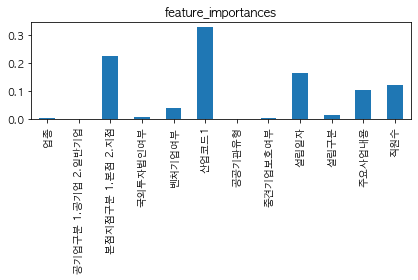

In [11]:
import  matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'

forest_importances = pd.Series(model.feature_importances_, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("feature_importances")
fig.tight_layout()
plt.show()

In [17]:
from sklearn.tree import export_graphviz
import pydotplus

estimator = model.estimators_[0]

# # .dot 파일로 export 해줍니다
dt_dot_data = export_graphviz(estimator, out_file='tree.dot', 
                # feature_names = X.columns.tolist(),
                # class_names = y_test['휴폐업 유무'].tolist(),
                max_depth = 5, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

# # 생성된 .dot 파일을 .png로 변환
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# # jupyter notebook에서 .png 직접 출력
# from IPython.display import Image
# Image(filename = 'decistion-tree.png')

TypeError: object of type 'NoneType' has no len()

In [15]:
!pip3 install graphviz

ERROR: Could not find a version that satisfies the requirement graphviz (from versions: none)
ERROR: No matching distribution found for graphviz
